In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_df=pd.read_csv("../cleaned_csvs/combined.csv")

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349795 entries, 0 to 349794
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           349795 non-null  int64  
 1   FL_DATE              349795 non-null  object 
 2   OP_UNIQUE_CARRIER    349795 non-null  object 
 3   ORIGIN               349795 non-null  object 
 4   ORIGIN_CITY_NAME     349795 non-null  object 
 5   DEST                 349795 non-null  object 
 6   DEST_CITY_NAME       349795 non-null  object 
 7   CRS_DEP_TIME         349795 non-null  int64  
 8   DEP_DELAY            342476 non-null  float64
 9   DEP_DELAY_NEW        342476 non-null  float64
 10  ARR_TIME             342327 non-null  float64
 11  ARR_DELAY            341706 non-null  float64
 12  ARR_DELAY_NEW        341706 non-null  float64
 13  CANCELLED            349795 non-null  float64
 14  CARRIER_DELAY        59948 non-null   float64
 15  WEATHER_DELAY    

In [4]:
# Delete Unwated Columns

del data_df['Unnamed: 0']
del data_df['ORIGIN_CITY_NAME']
del data_df['DEST_CITY_NAME']
del data_df['ARR_TIME']
del data_df['DEP_DELAY']
del data_df['ARR_DELAY']
del data_df['ARR_DELAY_NEW']
del data_df['CRS_DEP_TIME']

data_df

,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_DELAY_NEW,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,year,month
0,2020-01-01,WN,PHX,CLE,6.0,0.0,NaN,NaN,NaN,NaN,NaN,2020,1
1,2020-01-01,WN,STL,CLE,14.0,0.0,NaN,NaN,NaN,NaN,NaN,2020,1
2,2020-01-01,WN,STL,CLE,20.0,0.0,NaN,NaN,NaN,NaN,NaN,2020,1
3,2020-01-02,WN,ATL,CLE,2.0,0.0,NaN,NaN,NaN,NaN,NaN,2020,1
4,2020-01-02,WN,ATL,CLE,20.0,0.0,NaN,NaN,NaN,NaN,NaN,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
349790,2016-12-31,WN,MDW,CLE,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2016,12
349791,2016-12-31,WN,MDW,CLE,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2016,12
349792,2016-12-31,WN,MDW,CLE,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2016,12
349793,2016-12-31,WN,PHX,CLE,20.0,0.0,NaN,NaN,NaN,NaN,NaN,2016,12


In [5]:
# FLights Departing from Cleveland Airport "CLE"

dep_cle_df=data_df.loc[data_df["ORIGIN"] =="CLE"]
dep_cle_df

,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_DELAY_NEW,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,year,month
15,2020-01-31,WN,CLE,ATL,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2020,1
16,2020-01-31,WN,CLE,BNA,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2020,1
17,2020-01-31,WN,CLE,BNA,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2020,1
18,2020-01-31,WN,CLE,BWI,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2020,1
19,2020-01-31,WN,CLE,BWI,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
349782,2016-12-31,WN,CLE,MDW,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2016,12
349783,2016-12-31,WN,CLE,MDW,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2016,12
349784,2016-12-31,WN,CLE,PHX,1.0,0.0,NaN,NaN,NaN,NaN,NaN,2016,12
349785,2016-12-31,WN,CLE,PHX,9.0,0.0,NaN,NaN,NaN,NaN,NaN,2016,12


In [6]:
dep_cle_df['OP_UNIQUE_CARRIER'].unique()

array(['WN', 'MQ', 'YV', 'AA', 'F9', 'NK', 'DL', 'OO', 'UA', 'YX', '9E',
       'EV', 'OH', 'G4', 'B6'], dtype=object)

In [7]:
# Add unique carrier name column
# create dict of unique_carrier codes to names
# map to unique_carrier column to transform values to strings
# carrier names were acquired from BTS statistics definitions

unique_carrier_dict = {'F9':'Frontier','DL':'Delta',
                       'NK':'Spirit','EV':'ExpressJet','OO':'SkyWest Airlines',
                       'UA':'United','AA':'American Airlines',
                       'B6':'JetBlue','WN':'Southwest Airlines', 'OH':'US Airways',
                       'YX':'Republic Airways', '9E':'Endeavor Air', 'MQ':'Envoy Air Inc',
                       'YV':'Mesa Airlines', 'G4':'Allegiant Air'}

#map dict to unique_carrier column

dep_cle_df['unique_carrier_nm'] = dep_cle_df['OP_UNIQUE_CARRIER'].map(unique_carrier_dict)

#view final dataframe on flight origin and destination

dep_cle_df.head()

/Users/diegogonzalez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_DELAY_NEW,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,year,month,unique_carrier_nm
15,2020-01-31,WN,CLE,ATL,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2020,1,Southwest Airlines
16,2020-01-31,WN,CLE,BNA,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2020,1,Southwest Airlines
17,2020-01-31,WN,CLE,BNA,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2020,1,Southwest Airlines
18,2020-01-31,WN,CLE,BWI,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2020,1,Southwest Airlines
19,2020-01-31,WN,CLE,BWI,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2020,1,Southwest Airlines


In [8]:
# Clear NaNs

dep_clean_df = dep_cle_df.fillna(0)
dep_clean_df

,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_DELAY_NEW,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,year,month,unique_carrier_nm
15,2020-01-31,WN,CLE,ATL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1,Southwest Airlines
16,2020-01-31,WN,CLE,BNA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1,Southwest Airlines
17,2020-01-31,WN,CLE,BNA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1,Southwest Airlines
18,2020-01-31,WN,CLE,BWI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1,Southwest Airlines
19,2020-01-31,WN,CLE,BWI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1,Southwest Airlines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349782,2016-12-31,WN,CLE,MDW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,12,Southwest Airlines
349783,2016-12-31,WN,CLE,MDW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,12,Southwest Airlines
349784,2016-12-31,WN,CLE,PHX,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,12,Southwest Airlines
349785,2016-12-31,WN,CLE,PHX,9.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,12,Southwest Airlines


In [9]:
fligh_per_carrier_df = dep_clean_df.groupby('unique_carrier_nm')['unique_carrier_nm'].count().rename_axis('Airline').reset_index(name='Number of flights per Carrier')
fligh_per_carrier_df

,Airline,Number of flights per Carrier
0,Allegiant Air,1494
1,American Airlines,11159
2,Delta,13195
3,Endeavor Air,8494
4,Envoy Air Inc,7866
5,ExpressJet,31970
6,Frontier,12314
7,JetBlue,5773
8,Mesa Airlines,1944
9,Republic Airways,4203


<function matplotlib.pyplot.show(*args, **kw)>

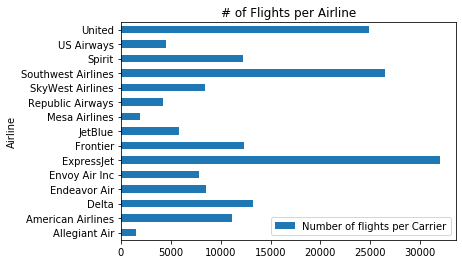

In [10]:
# plot number of flights per carrier

fligh_per_carrier_df.plot.barh(x='Airline', y='Number of flights per Carrier',
                               title="# of Flights per Airline");


plt.savefig('# of Flights per Airline - Overall.jpg',bbox_inches='tight', dpi=150)
plt.show

In [11]:
# Create a column with Ontime, Late Cancelled status

dep_clean_df.loc[dep_clean_df.DEP_DELAY_NEW <= 15, "Flight Status"]="OnTime"
dep_clean_df.loc[dep_clean_df.DEP_DELAY_NEW > 15, "Flight Status"]="Late"
dep_clean_df.loc[dep_clean_df.CANCELLED == 1, "Flight Status"]="Cancelled"
dep_clean_df.head()

,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_DELAY_NEW,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,year,month,unique_carrier_nm,Flight Status
15,2020-01-31,WN,CLE,ATL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1,Southwest Airlines,OnTime
16,2020-01-31,WN,CLE,BNA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1,Southwest Airlines,OnTime
17,2020-01-31,WN,CLE,BNA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1,Southwest Airlines,OnTime
18,2020-01-31,WN,CLE,BWI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1,Southwest Airlines,OnTime
19,2020-01-31,WN,CLE,BWI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1,Southwest Airlines,OnTime


In [12]:
# Count Flight Status

flightstatus_df = dep_clean_df.groupby('Flight Status')['Flight Status'].count()
flightstatus_df

Flight Status
Cancelled      3753
Late          26355
OnTime       144785
Name: Flight Status, dtype: int64

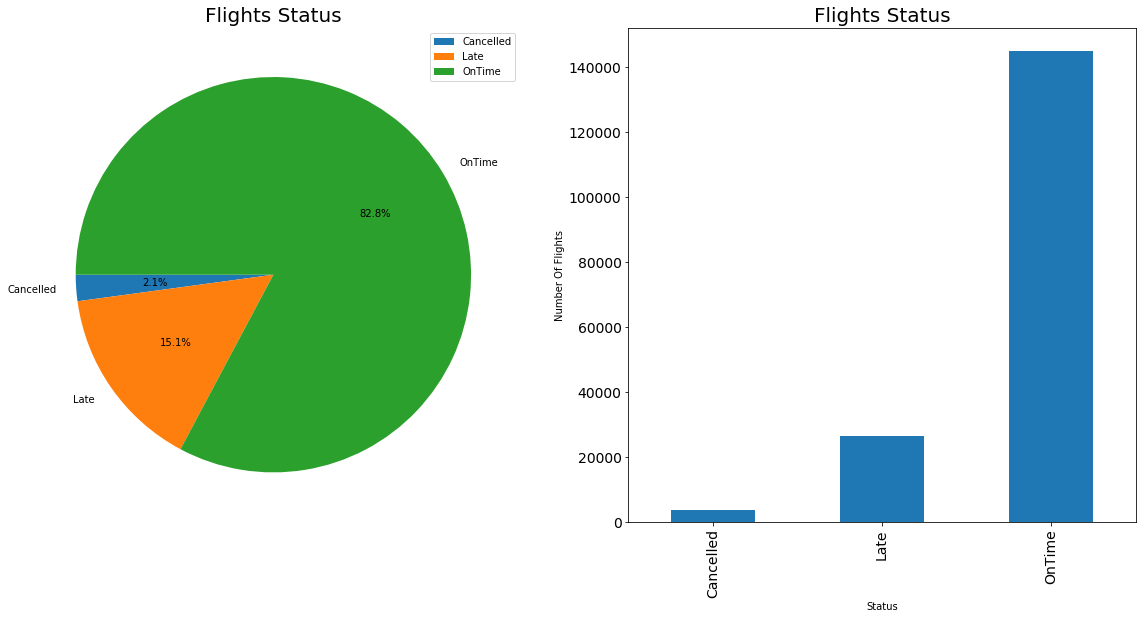

In [13]:
# Plot FLight Status

fig = plt.figure(figsize=[20, 20])
ax = fig.add_subplot(221)
ax.pie(flightstatus_df, labels=flightstatus_df.index, startangle=180, autopct='%1.1f%%')
ax.set_title("Flights Status", fontsize=20);
plt.gcf().gca()
plt.legend()

ax2 = fig.add_subplot(222)
ax2.set_title("Flights Status", fontsize=20);
ax2.set_facecolor('white')
flightstatus_df.plot(kind='bar', ax=ax2,  legend=False, fontsize=14)
plt.xlabel('Status')
plt.ylabel('Number Of Flights')
plt.savefig('flight status - Overall.jpg',bbox_inches='tight', dpi=150)
plt.show()

In [14]:
# Flitering flights by delays > 15 min

delays_df = dep_clean_df.loc[dep_clean_df['DEP_DELAY_NEW'] > 15]
delays_df

,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_DELAY_NEW,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,year,month,unique_carrier_nm,Flight Status
68,2020-01-07,WN,CLE,MKE,83.0,0.0,0.0,0.0,0.0,0.0,58.0,2020,1,Southwest Airlines,Late
84,2020-01-12,MQ,CLE,ORD,31.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1,Envoy Air Inc,Late
95,2020-01-23,MQ,CLE,ORD,28.0,0.0,0.0,0.0,0.0,0.0,25.0,2020,1,Envoy Air Inc,Late
96,2020-01-24,MQ,CLE,ORD,22.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1,Envoy Air Inc,Late
100,2020-01-28,MQ,CLE,ORD,27.0,0.0,0.0,0.0,0.0,0.0,23.0,2020,1,Envoy Air Inc,Late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349693,2016-12-20,WN,CLE,PHX,39.0,0.0,2.0,0.0,0.0,0.0,23.0,2016,12,Southwest Airlines,Late
349727,2016-12-27,WN,CLE,MDW,104.0,0.0,0.0,0.0,0.0,0.0,96.0,2016,12,Southwest Airlines,Late
349744,2016-12-28,WN,CLE,BNA,55.0,0.0,0.0,0.0,0.0,22.0,0.0,2016,12,Southwest Airlines,Late
349757,2016-12-28,WN,CLE,MDW,30.0,0.0,0.0,0.0,0.0,0.0,17.0,2016,12,Southwest Airlines,Late


In [15]:
# Grouping delayed flights by carrier

groupby_df = delays_df.groupby(['unique_carrier_nm'])['DEP_DELAY_NEW'].count()
groupby_df

unique_carrier_nm
Allegiant Air          323
American Airlines     1359
Delta                 1369
Endeavor Air          1354
Envoy Air Inc         1391
ExpressJet            5973
Frontier              2357
JetBlue               1008
Mesa Airlines          227
Republic Airways       677
SkyWest Airlines      1466
Southwest Airlines    3270
Spirit                2327
US Airways             677
United                2647
Name: DEP_DELAY_NEW, dtype: int64

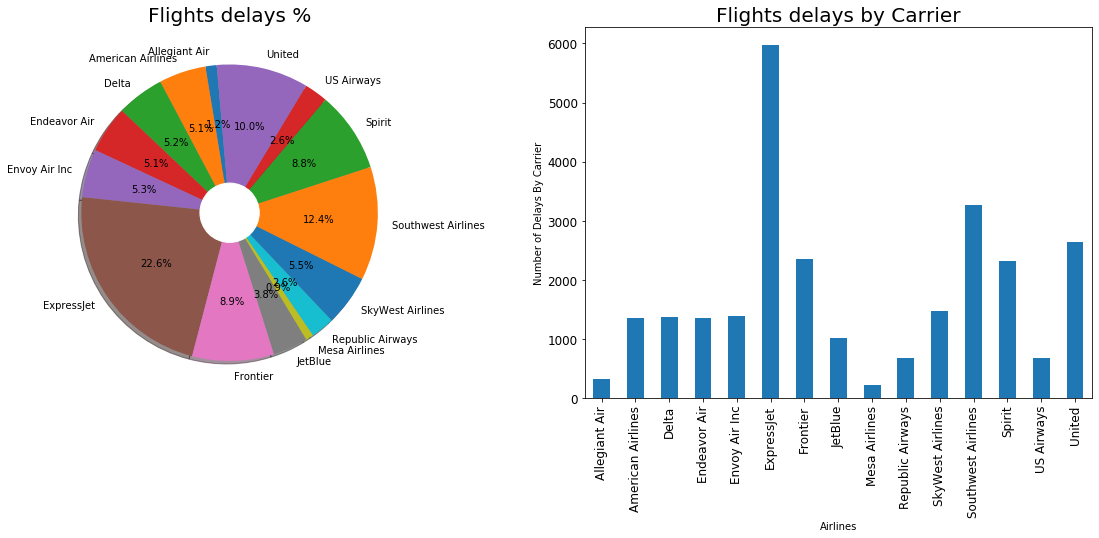

In [16]:
# Plot Delayed flights by carrier

fig = plt.figure(figsize=[20, 15])
ax = fig.add_subplot(221)
ax.pie(groupby_df, labeldistance=1.1, labels=groupby_df.index, startangle=95, autopct='%1.1f%%', shadow=True)
ax.set_title("Flights delays %", fontsize=20);
plt.gcf().gca().add_artist(plt.Circle( (0,0), 0.2, color='white'))

ax2 = fig.add_subplot(222)
ax2.set_title("Flights delays by Carrier", fontsize=20);
ax2.set_facecolor('white')
groupby_df.plot(kind='bar', ax=ax2,  legend=False, fontsize=12)
plt.xlabel('Airlines')
plt.ylabel('Number of Delays By Carrier')
plt.savefig('Flights delays by Carrier - Overall.jpg',bbox_inches='tight', dpi=150)
plt.show()

In [17]:
# Filter Delays by category

# Carrier Delays

delays_df[delays_df['CARRIER_DELAY'] > 15]['CARRIER_DELAY'].count()

6479

In [18]:
carrier_delays_df = delays_df.loc[delays_df['CARRIER_DELAY'] > 15].groupby('unique_carrier_nm')['unique_carrier_nm'].count().rename_axis('Airline').reset_index(name='Carrier Delays')
carrier_delays_df

,Airline,Carrier Delays
0,Allegiant Air,70
1,American Airlines,389
2,Delta,455
3,Endeavor Air,229
4,Envoy Air Inc,321
5,ExpressJet,1733
6,Frontier,703
7,JetBlue,319
8,Mesa Airlines,52
9,Republic Airways,132


In [19]:
# Weather Delays

delays_df[delays_df['WEATHER_DELAY'] > 15]['WEATHER_DELAY'].count()

529

In [20]:
weather_delays_df = delays_df.loc[delays_df['WEATHER_DELAY'] > 15].groupby('unique_carrier_nm')['unique_carrier_nm'].count().rename_axis('Airline').reset_index(name='Weather Delays')
weather_delays_df

,Airline,Weather Delays
0,Allegiant Air,6
1,American Airlines,32
2,Delta,53
3,Endeavor Air,24
4,Envoy Air Inc,17
5,ExpressJet,52
6,Frontier,21
7,JetBlue,17
8,Mesa Airlines,17
9,Republic Airways,16


In [21]:
# NAS Delays

delays_df[delays_df['NAS_DELAY'] > 15]['NAS_DELAY'].count()

6849

In [22]:
nas_delays_df = delays_df.loc[delays_df['NAS_DELAY'] > 15].groupby('unique_carrier_nm')['unique_carrier_nm'].count().rename_axis('Airline').reset_index(name='NAS Delays')
nas_delays_df

,Airline,NAS Delays
0,Allegiant Air,43
1,American Airlines,191
2,Delta,153
3,Endeavor Air,521
4,Envoy Air Inc,400
5,ExpressJet,2238
6,Frontier,481
7,JetBlue,224
8,Mesa Airlines,23
9,Republic Airways,309


In [23]:
# Security Delays

delays_df[delays_df['SECURITY_DELAY'] > 15]['SECURITY_DELAY'].count()

47

In [24]:
security_delays_df = delays_df.loc[delays_df['SECURITY_DELAY'] > 15].groupby('unique_carrier_nm')['unique_carrier_nm'].count().rename_axis('Airline').reset_index(name='Security Delays')
security_delays_df

,Airline,Security Delays
0,American Airlines,3
1,Endeavor Air,1
2,JetBlue,2
3,Mesa Airlines,1
4,Southwest Airlines,31
5,Spirit,7
6,US Airways,2


In [25]:
#Late Aircraft Delays

delays_df[delays_df['LATE_AIRCRAFT_DELAY'] > 15]['LATE_AIRCRAFT_DELAY'].count()

10172

In [26]:
late_aircaft_df = delays_df.loc[delays_df['LATE_AIRCRAFT_DELAY'] > 15].groupby('unique_carrier_nm')['unique_carrier_nm'].count().rename_axis('Airline').reset_index(name='Late Aircraft Delays')
late_aircaft_df

,Airline,Late Aircraft Delays
0,Allegiant Air,219
1,American Airlines,609
2,Delta,400
3,Endeavor Air,573
4,Envoy Air Inc,614
5,ExpressJet,1885
6,Frontier,1003
7,JetBlue,413
8,Mesa Airlines,105
9,Republic Airways,184


In [27]:
# Merge Delays per Category

merge = pd.merge(carrier_delays_df, weather_delays_df)
merge2 = pd.merge(merge, nas_delays_df)
merge3 =pd.merge(merge2, late_aircaft_df)
merge4 = pd.merge(merge3, security_delays_df, how='outer')
delays_category = merge4.fillna(0)
delays_category

,Airline,Carrier Delays,Weather Delays,NAS Delays,Late Aircraft Delays,Security Delays
0,Allegiant Air,70,6,43,219,0.0
1,American Airlines,389,32,191,609,3.0
2,Delta,455,53,153,400,0.0
3,Endeavor Air,229,24,521,573,1.0
4,Envoy Air Inc,321,17,400,614,0.0
5,ExpressJet,1733,52,2238,1885,0.0
6,Frontier,703,21,481,1003,0.0
7,JetBlue,319,17,224,413,2.0
8,Mesa Airlines,52,17,23,105,1.0
9,Republic Airways,132,16,309,184,0.0


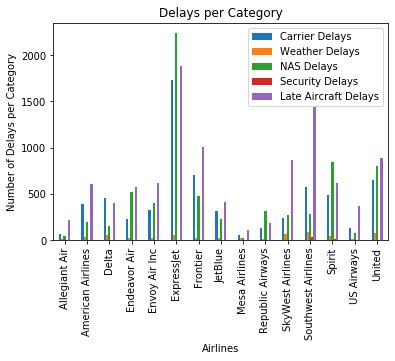

In [28]:
# Plot Delays by category

delays_category.plot(x="Airline", y=["Carrier Delays", "Weather Delays", "NAS Delays", "Security Delays", "Late Aircraft Delays"], kind="bar")
plt.xlabel('Airlines')
plt.ylabel('Number of Delays per Category')
plt.title('Delays per Category')
plt.savefig('Delays per category - Overall.jpg',bbox_inches='tight', dpi=150)
plt.show()

In [29]:
# Flights By Month

delays_df.loc[:, 'month'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
                                  ['01-Jan', '02-Feb', '03-March', '04-Apr', '05-May', '06-Jun',
                                  '07-Jul', '08-Aug', '09-Sep', '10-Oct', '11-Nov', '12-Dec'],
                                  inplace=True)

monthly_flights_df = dep_clean_df.groupby(['month'])['month'].count()
monthly_flights_df


/Users/diegogonzalez/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


month
1     16604
2     15648
3     18230
4     13777
5     10335
6     14751
7     15007
8     15133
9     14242
10    14469
11    13314
12    13383
Name: month, dtype: int64

In [30]:
# Delays by month

delays_df.loc[:, 'month'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
                                  ['01-Jan', '02-Feb', '03-March', '04-Apr', '05-May', '06-Jun',
                                  '07-Jul', '08-Aug', '09-Sep', '10-Oct', '11-Nov', '12-Dec'],
                                  inplace=True)

month_delay = delays_df.groupby(['month'])['DEP_DELAY_NEW'].count()
month_delay

month
01-Jan      2651
02-Feb      2272
03-March    2318
04-Apr      2007
05-May      1673
06-Jun      2704
07-Jul      2734
08-Aug      2553
09-Sep      1734
10-Oct      1763
11-Nov      1786
12-Dec      2230
Name: DEP_DELAY_NEW, dtype: int64

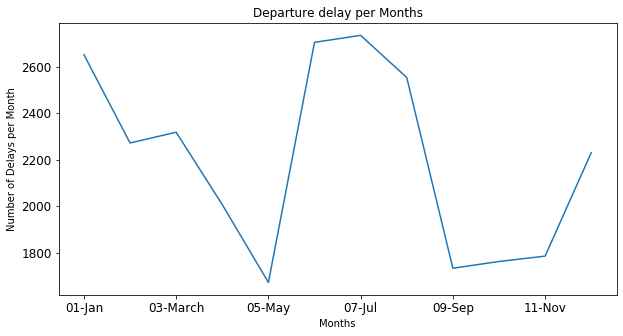

In [31]:
month_delay.plot(figsize=[10,5], title ="Departure delay per Months",  legend=False, fontsize=12)
plt.gca().set_facecolor('white')
plt.xlabel('Months')
plt.ylabel('Number of Delays per Month')
plt.savefig('Number of Delays per Month - Overall.jpg',bbox_inches='tight', dpi=150)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

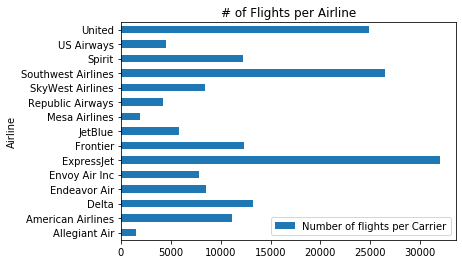

In [32]:
# plot number of flights per carrier

fligh_per_carrier_df.plot.barh(x='Airline', y='Number of flights per Carrier',
                               title="# of Flights per Airline");

plt.savefig('# of Flights per Airline - Overall.jpg',bbox_inches='tight', dpi=150)
plt.show